In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
# load date
data_file = 'energy+efficiency/ENB2012_data.xlsx'

dataframe = pd.read_excel(data_file)

dataframe.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [291]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [292]:
dataframe.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
for column in columns:
    plt.scatter(dataframe[column],dataframe["Y1"] )
    plt.show()

In [294]:
# normalize with min max scaler
dataframe_remove_y2 = dataframe.drop(['Y2'] , axis=1)
dataframe_remove_y2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [295]:
from sklearn import preprocessing

# create a min max scaler
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
array_minmax = minmax_scaler.fit_transform(dataframe_remove_y2)

array_minmax

array([[1.        , 0.        , 0.28571429, ..., 0.        , 0.        ,
        0.25721219],
       [1.        , 0.        , 0.28571429, ..., 0.        , 0.        ,
        0.25721219],
       [1.        , 0.        , 0.28571429, ..., 0.        , 0.        ,
        0.25721219],
       ...,
       [0.        , 1.        , 0.71428571, ..., 1.        , 1.        ,
        0.28120787],
       [0.        , 1.        , 0.71428571, ..., 1.        , 1.        ,
        0.28228633],
       [0.        , 1.        , 0.71428571, ..., 1.        , 1.        ,
        0.28660016]])

dataframe[x1]

In [296]:
# convert array to dataframe
dataframe_minmax = pd.DataFrame(array_minmax , columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','Y1'])
dataframe_minmax

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838
...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286


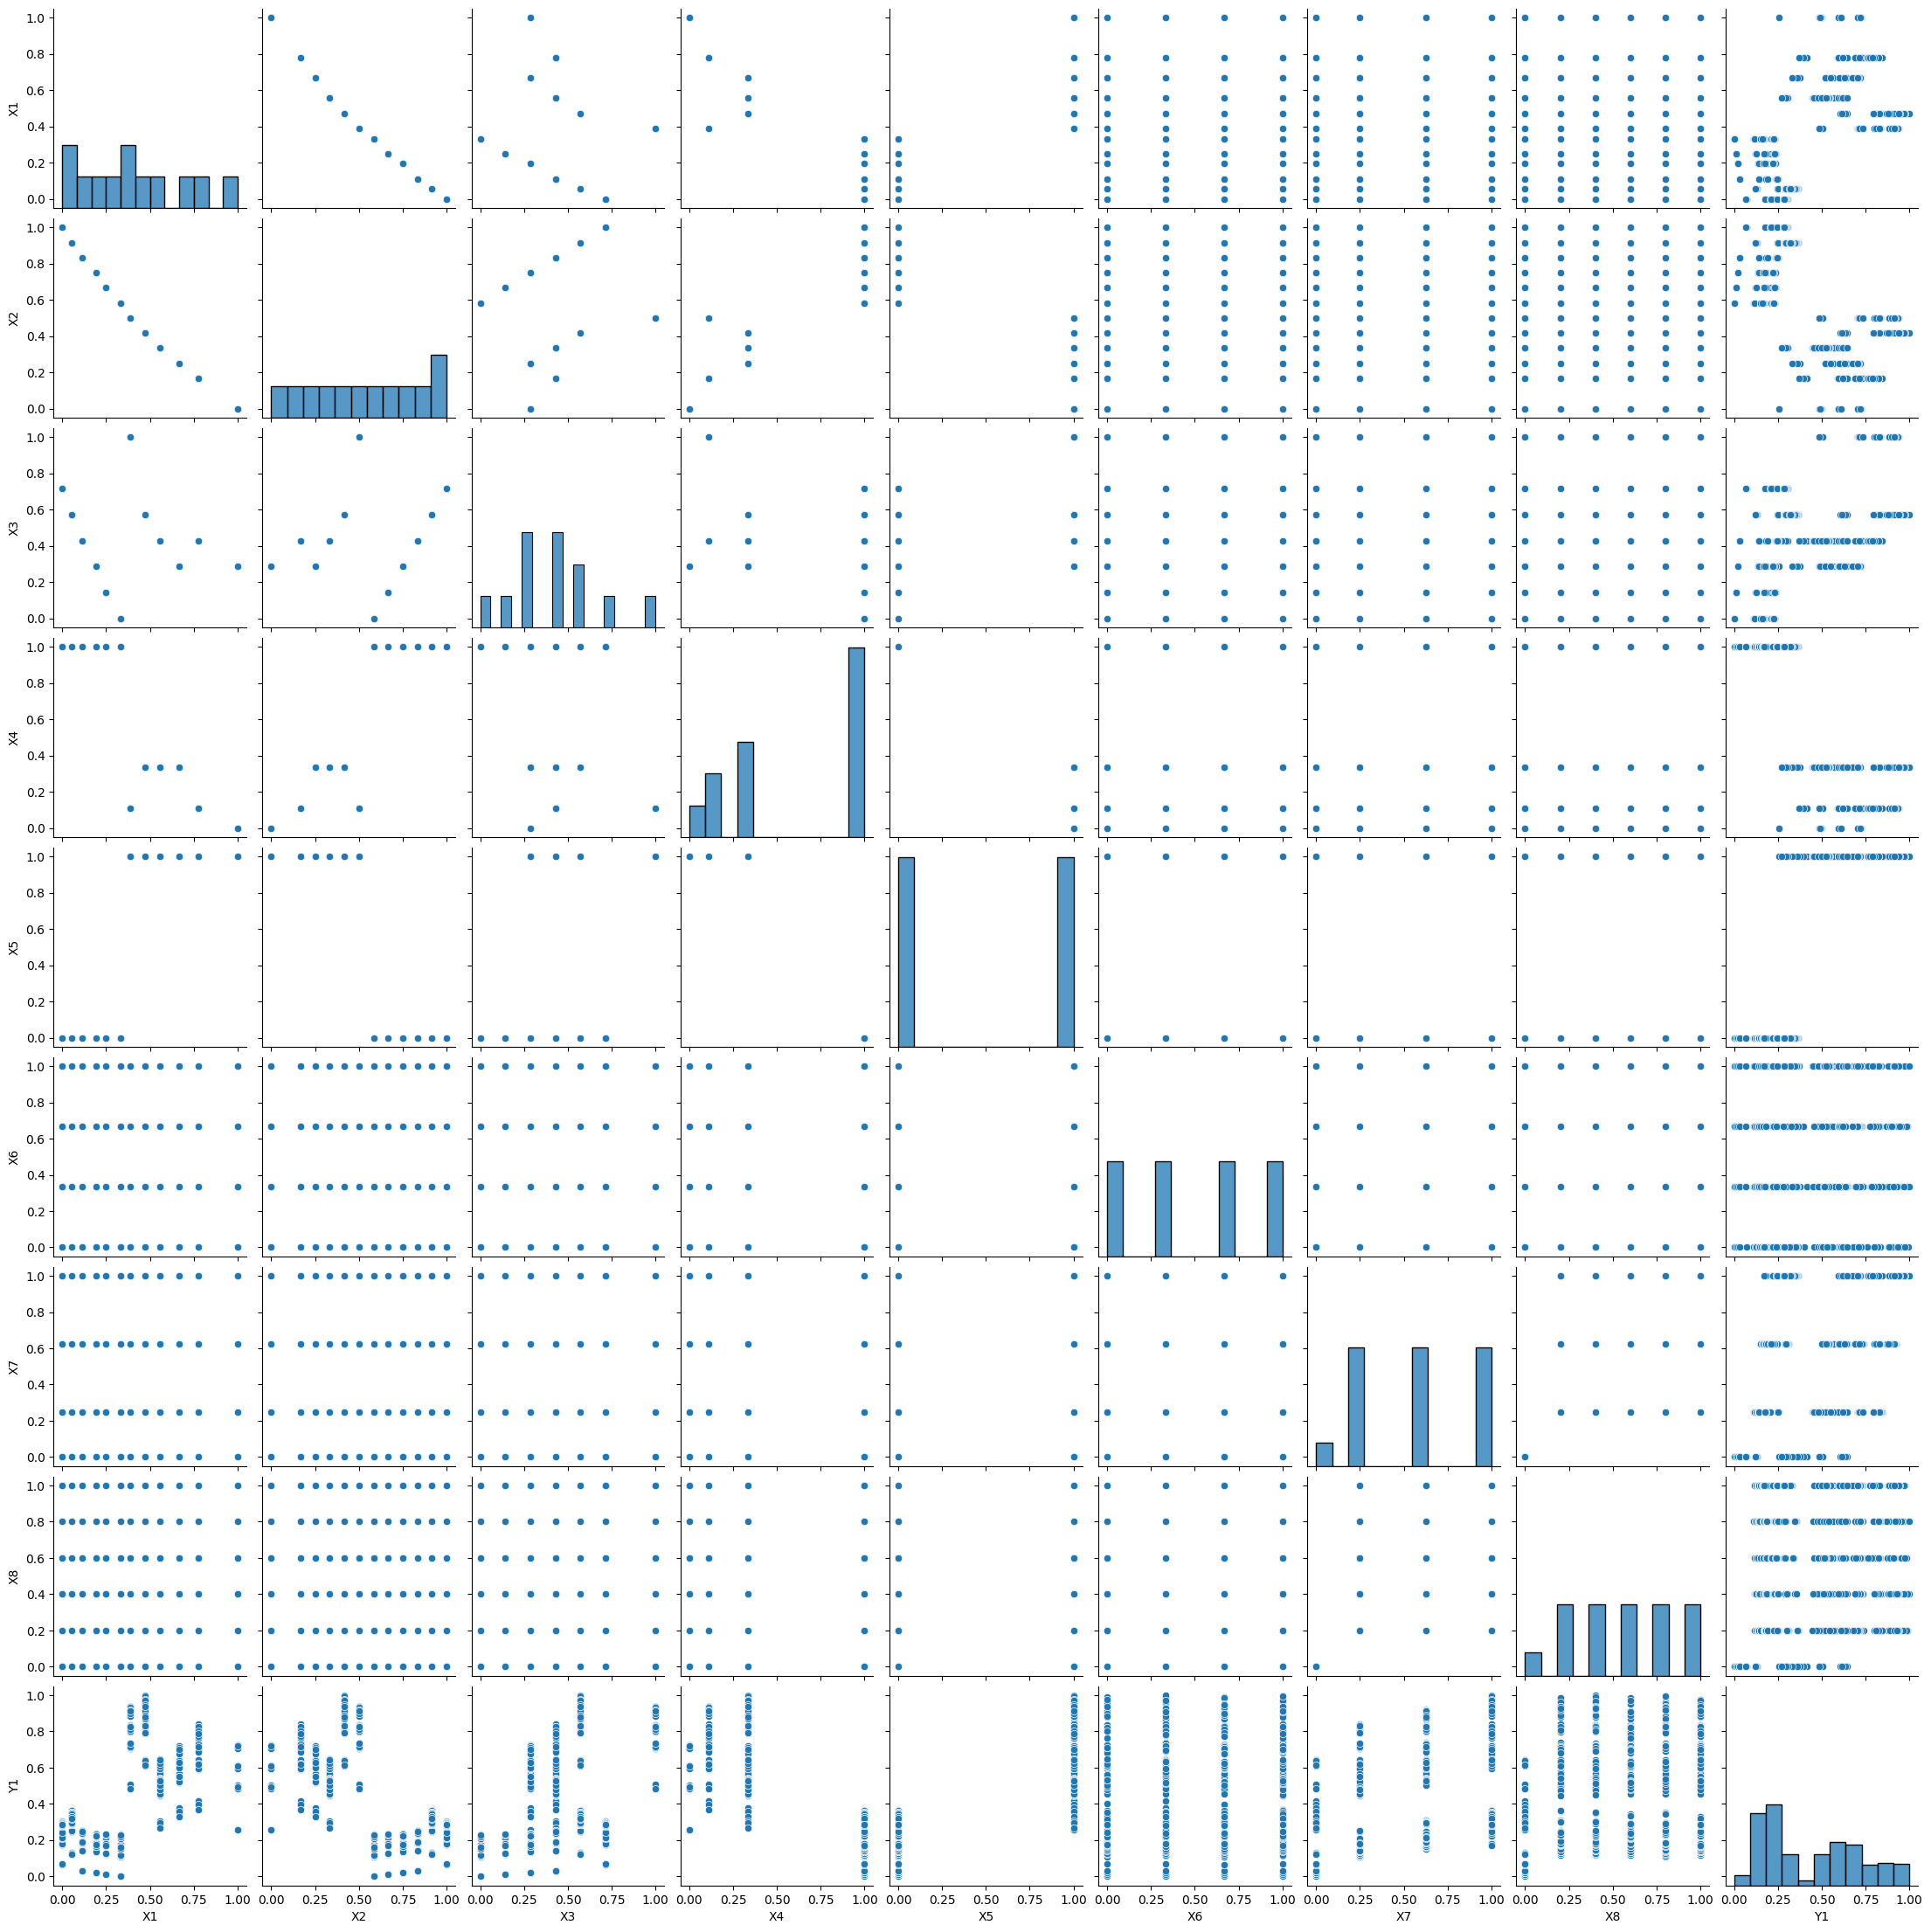

In [297]:
sns.pairplot(dataframe_minmax)

<Axes: >

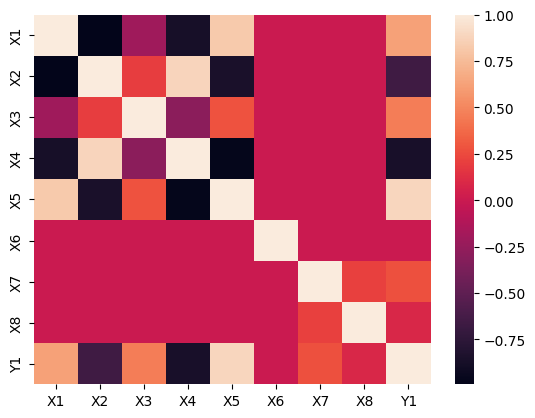

In [298]:
# correlation matrix
sns.heatmap(dataframe_minmax.corr())

In [317]:
import numpy as np
import matplotlib.pyplot as plt 

epoch = 300
X = dataframe_minmax.drop('Y1',axis=1).values
y = dataframe_minmax[['Y1']].values
n_samples , n_features = X.shape
w = np.zeros(n_features)
b = 0 # bias
learn_rate = 0.005
dj_dw = np.zeros(n_features)
dj_db = 0 

In [318]:
def cost_function(X,y,w,b):
    
    cost = 0
    for i in range(n_samples):
        y_model =  np.dot(X[i] ,w) + b 
        error = y_model - y[i][0]
        cost += error ** 2
    cost = cost / ( n_samples)
    
    return cost


In [319]:
def batch_gradient_descent(X,y,w,b,n_samples):
    dj_dw = np.zeros(n_features)
    dj_db = 0 
    for i in range(n_samples):
        error = (np.dot(X[i], w) + b) - y[i]

        for j in range(n_features):
            dj_dw = dj_dw + error * X[i]
        dj_db = dj_db + error
    dj_dw = dj_dw / n_samples
    dj_db = dj_db / n_samples
    
    return dj_dw , dj_db

cost_array = []
for i in range(epoch):
    dj_dw,dj_db = batch_gradient_descent(X,y,w,b,n_samples)
    w = w - learn_rate * dj_dw
    b = b - learn_rate * dj_db
    cost_array.append(cost_function(X,y,w,b))


print("w :", w )
print("b: ", b)
# cost_array


w : [ 0.11089795  0.03308656  0.20533062 -0.07681492  0.34403536  0.01352581
  0.17711403  0.05783797]
b:  [0.02180883]


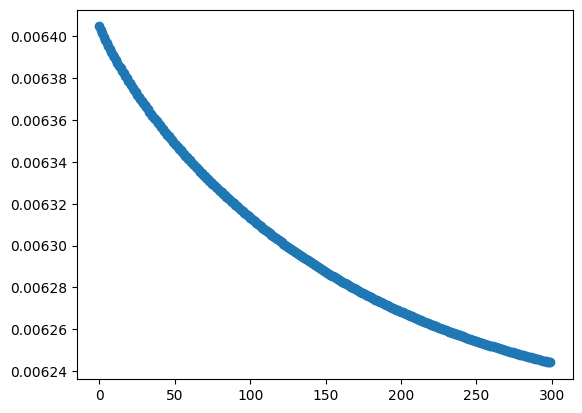

In [283]:
plt.scatter(range(epoch) , cost_array)

In [284]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[[-0.62869872 -0.24207484  0.01878761 -0.33737905  0.39349792 -0.00188705
   0.21496615  0.02747059]]
[0.67839528]


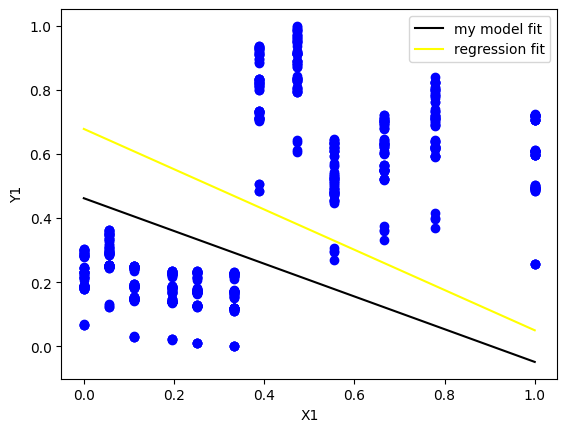

In [285]:
x1_data = dataframe_minmax['X1'].values
y1_data = dataframe_minmax['Y1'].values

y_predict = w[0] * x1_data + b
y_model_regression = model.coef_[0,0] * x1_data + model.intercept_

plt.scatter(x1_data , y1_data , color = 'blue')
plt.plot(x1_data, y_predict , color = 'black' , label = 'my model fit')
plt.plot(x1_data,y_model_regression ,color = 'yellow' , label = 'regression fit')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend()
plt.show()

In [286]:
from sklearn.metrics import mean_squared_error , r2_score

y_manual = np.dot(X,w) + b
y_sklearn = model.predict(X)

print("MSE manual: " , mean_squared_error(y,y_manual))
print("MSE sklearn: " , mean_squared_error(y,y_sklearn))
print("R2  manual: " , r2_score(y,y_manual))
print("R2  sklearn: " , r2_score(y,y_sklearn))

MSE manual:  0.006244145483844624
MSE sklearn:  0.006193742797244775
R2  manual:  0.9155202451182087
R2  sklearn:  0.9162021649454062


In [287]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=42,shuffle=True)

# sklearn linear model to predict y 
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_sklearn = model.predict(X_test)

# gradient descent to predict y
n_train = X_train.shape[0]
n_test = X_test.shape[0]
w1 = np.zeros(n_features)
b1=0
for i in range(epoch):
    dw1,db1 = batch_gradient_descent(X_train,y_train,w1,b1,n_train)
    w1 = w1 - learn_rate * dw1
    b1 = b1 - learn_rate * db1

y_pred_GD = np.zeros(n_test)  
for i in range(n_test):
    y_pred_GD[i] = np.dot(w1, X_test[i]) + b1
    
print("MSE sklearn train test split: " , mean_squared_error(y_test,y_pred_sklearn))
print("MSE GD train test split: " , mean_squared_error(y_test,y_pred_GD))


MSE sklearn train test split:  0.006425616722074634
MSE GD train test split:  0.006839476781296118


/tmp/ipykernel_6503/1464777965.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_GD[i] = np.dot(w1, X_test[i]) + b1


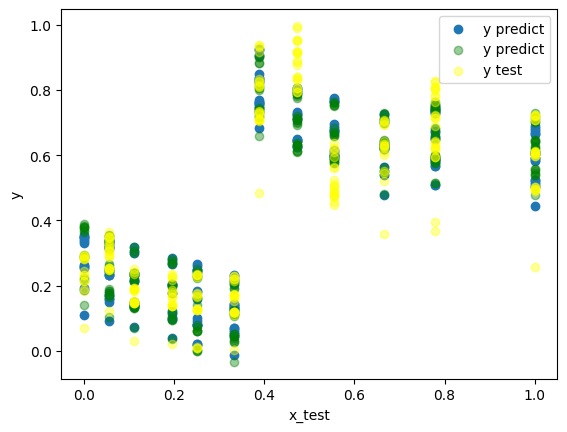

In [288]:
plt.scatter(X_test[: ,0],y_pred_sklearn , label = 'y predict')
plt.scatter(X_test[: ,0],y_pred_GD,color = 'green' , label = 'y predict', alpha=0.4)
plt.scatter(X_test[: ,0] ,y_test ,color ='yellow',label = 'y test' , alpha =0.4)
plt.xlabel('x_test')
plt.ylabel('y')
plt.legend()


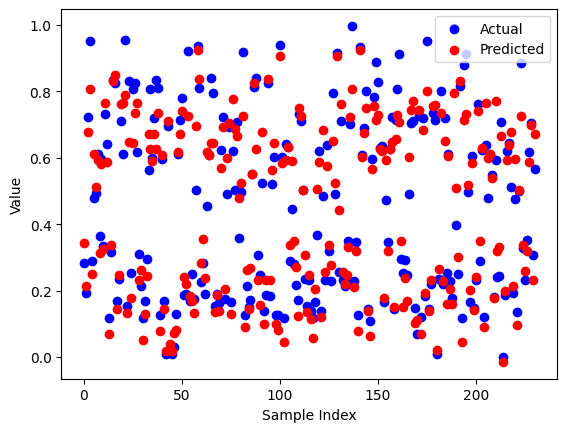

In [195]:
import matplotlib.pyplot as plt


plt.scatter(range(len(y_test.flatten())), y_test.flatten(), color='blue', label='Actual')

plt.scatter(range(len(y_pred_sklearn.flatten())), y_pred_sklearn.flatten(), color='red', label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()


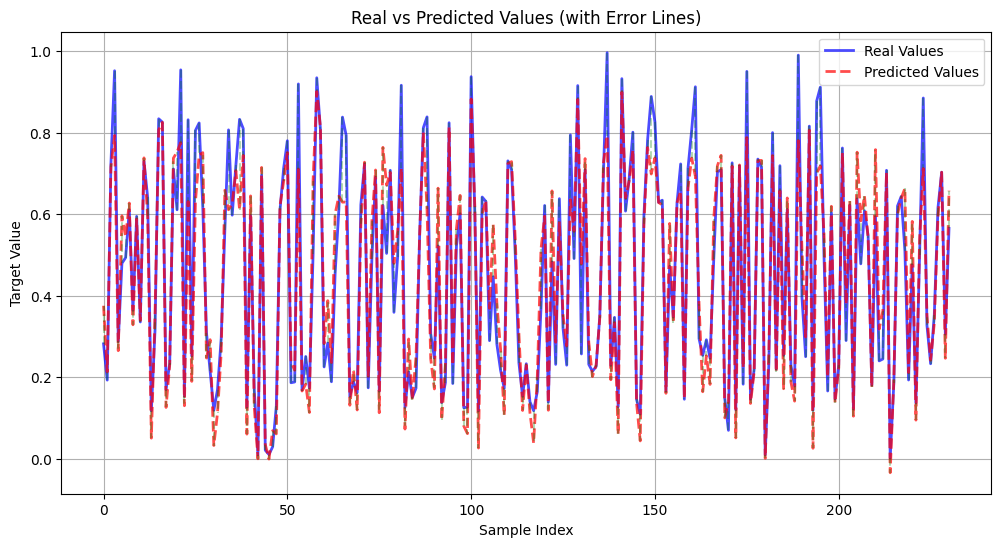

In [196]:
import matplotlib.pyplot as plt

# Ensure both arrays are 1D
y_test_flat = y_test.flatten()
y_pred_flat = y_pred_GD.flatten()

plt.figure(figsize=(12, 6))

plt.plot(y_test_flat, 'b-', label='Real Values', alpha=0.7, linewidth=2)
plt.plot(y_pred_flat, 'r--', label='Predicted Values', alpha=0.7, linewidth=2)

# Error lines
for i in range(len(y_test_flat)):
    plt.plot([i, i], [y_test_flat[i], y_pred_flat[i]], 'g--', alpha=0.3)

plt.title('Real vs Predicted Values (with Error Lines)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()
